# DS workshop  - Data Science with Python

## Dimensionality reduction

**Author**: Philip Wilkinson, Head of Science (21/22), UCL DSS

**Date** 9th December 2021

***Proudly presented by the UCL Data Science Society***

### Introduction

Welcome to the Workshop on Dimensionality reduction techniques presented by the UCL Data Science Society. In this workshop we will cover the topics of:

1. [What is dimensionality reduction](#DR)
2. [Feature Extraction using Random Forests](#RF)
3. [Priciple Component Analysis](#PCA)
4. [t-distributed Stochastic Neighbor Embedding](#tsne)

The dataset comes from [basketball reference](https://www.basketball-reference.com/leagues/NBA_2021_per_game.html) and covers the statistics of the 2018-2019 NBA seasons. This data was previously explored in the [Random Forest workshop](https://github.com/UCL-DSS/random-forest-workshop) so we won't go into too much data exploration.

<a id = "DR"></a>

## What is dimensionality reduction?

Dimensionality reduction comes (in most cases) under the heading of an unsupervised machine learning algorithm meaning that we often don't have a specific target to aim for. Specifically, it is the process of reducing the number of attributes or variables in a dataset while attempting to keep as much of the variation in the original data as possible. The main of aim of this is to either reduce the number of features so as to reduce the computational resources required to run a model or to aid in visualising the data before any analysis is performed. This is a preprocessing step meaning that this is performed before we train or create any model which differentiates this step from Feature Extraction. It is also further differentiated from feature extraction in that while feature extraction removes variables from the analysis, dimensionality reduction creates new ones from existing variables.

There are many algorithms that can be used for dimensionality reduction but they are primarily drawn from two main groups of linear algebra and manifold learning. 

### Linear Algebra

Linear algebra algorithms draw from matrix factorisation methods which can be used for dimensionality reduction by examining the linear relationship between variables that we may be using. Common methods from this branch include:

- Principle Components Analysis
- Singular Value Decomposition
- Non-Negative Matrix Factorisation
- Factor Analysis
- Linear Discriminant Analysis

### Manifold learning

Manifold learning differs from linear algebra methods in that this uses non-linear approaches to dimensionality reduction and as such can often capture more complex relationships between variables than linear algebra methods can. Some of the popular methods of this branch include:

- Isomap embedding
- Locally Linear Embedding
- Multidimensional scaling
- Spectral embedding
- t-distributed Stochastic Neighbor Embedding

### Feature selection

The other branch that may fall loosely under the umbrella of dimensionality reduction is that of feature selection which differs from the previous two groups in that we only keep the most important features. This means that it is often undertaken after a model has been applied and is done in reference to a target variable whereas the other methods are often unsupervised. We have already seen this with Feature importance from Random Forests but popular methods in this regard include:

- Backward Elimination
- Forward Selection
- Random Forests

To this extent, each algorithm under the umbrella of dimensionality reduction offers a different approach to the challenge of discovering relationships between variables in a lower dimension. This often means that there is no best dimensionality reduction algorithm and there is no easy way to find the best algorithm for the data without using controlled experiments and broad exploration. 

However, there are many benefits of using this technique which can include:

- The space required to store the data is reduced as the number of dimensions decreases
- Fewer dimensions means less computation resources and training time are required in model implementation
- Some algorithms do not perform well when we have large dimensions so reducing the number of dimensions can increase the potential models that we can use 
- It takes care of multicollinearity in our dataset by removing redundant features and hence also removes noise from the data
- It can help the model avoid overfitting to the data by only focusing on the most import features in the data
- It can help with visualising of the data, especially when there are many features you may want to compare
- It can be used for image compression to make training much easier


### Data Preperation

Before we go any further we need to first of all clean the data and prepare it for our methods.

We can read this in from the [NBA_tot.txt](Data/NBA_tot.txt) file that we created for the [Random Forests workshop](https://github.com/UCL-DSS/random-forest-workshop). I won't go into too much detail as to the cleaning process here as it was covered previously:

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [27]:
#read in the NBA data
NBA = pd.read_csv("Data/NBA_tot.txt", sep = ",", header = 0)

In [28]:
#print the columns
print(NBA.columns.values)

['Rk' 'Player' 'Pos' 'Age' 'Tm' 'G' 'GS' 'MP' 'FG' 'FGA' 'FG%' '3P' '3PA'
 '3P%' '2P' '2PA' '2P%' 'eFG%' 'FT' 'FTA' 'FT%' 'ORB' 'DRB' 'TRB' 'AST'
 'STL' 'BLK' 'TOV' 'PF' 'PTS']


In [29]:
#drop the columns we are not interested in
NBA.drop(columns = ["Rk", "Age", "Tm", "GS"],
        inplace = True)

Text(0, 0.5, 'Position')

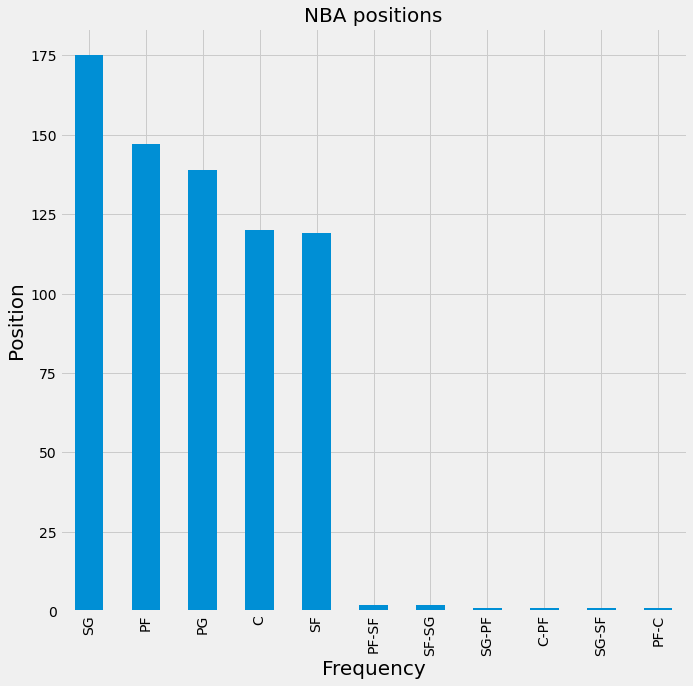

In [30]:
#extract a value count of positions
pos = NBA.Pos.value_counts()

#create a subplot
plt.subplots(figsize=(10, 10))
#plot the positions
pos.plot(kind="bar")
#add labels
plt.title("NBA positions", fontsize=20 )
plt.xlabel("Frequency", fontsize =20)
plt.ylabel("Position", fontsize=20 )

In [31]:
#extract dual positions
NBA[NBA.Pos.isin(["PF-SF", "SF-SG","SG-PF","SG-SF", "PF-C", "C-PF"])]

Player    Pos   G    MP   FG   FGA    FG%   3P  3PA  \
38    Harrison Barnes\barneha02  PF-SF  77  2533  431  1027  0.420  174  441   
102      Jimmy Butler\butleji01  SF-SG  65  2185  418   904  0.462   67  193   
128   Wilson Chandler\chandwi01  PF-SF  51  1177  114   273  0.418   59  158   
378       Kyle Korver\korveky01  SG-PF  70  1334  201   483  0.416  138  348   
426        Thon Maker\makerth01   C-PF  64   972  109   268  0.407   49  153   
436   Wesley Matthews\matthwe02  SF-SG  69  2091  279   698  0.400  150  403   
600  Jonathon Simmons\simmojo02  SG-SF  56  1064  133   350  0.380   28  104   
611       Jason Smith\smithja02   PF-C  20   190   21    59  0.356    9   26   

       3P%  ...    FT%  ORB  DRB  TRB  AST  STL  BLK  TOV   PF   PTS  
38   0.395  ...  0.824   57  304  361  115   50   13   98  122  1265  
102  0.347  ...  0.855  121  221  342  263  123   39   95  111  1215  
128  0.373  ...  0.720   48  167  215   82   25   21   46  123   305  
378  0.397  ...  0.822    9  153  162   81   25   12   59  106   600  
426  0.320  ...  0.667   41  161  202   45   21   51   33  105   323  
436  0.372  ...  0.810   32  138  170  160   54   17   91  160   840  
600  0.269  ...  0.742   27   99  126  128   29   15   68   89   366  
611  0.346  ...  0.875   16   36   52   14    3    7   13   30    65  

[8 rows x 26 columns]

In [32]:
#split into positions that are the first position
NBA["Pos"]= NBA["Pos"].apply(lambda x: x.split("-")[0] if "-" in x else x)

Text(0, 0.5, 'Position')

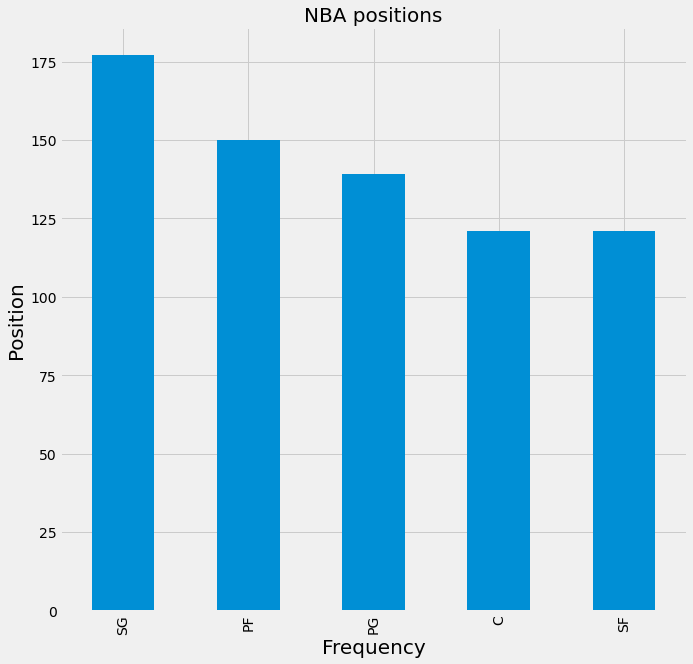

In [33]:
#recreate the same plot as above
pos = NBA.Pos.value_counts()
plt.subplots(figsize=(10, 10))
pos.plot(kind="bar")
plt.title("NBA positions", fontsize=20 )
plt.xlabel("Frequency", fontsize =20)
plt.ylabel("Position", fontsize=20 )

In [34]:
#find out which players are duplicated
duplicated_players = list(NBA[NBA.Player.duplicated(keep=False)]
                          .Player
                          .unique())
print(len(duplicated_players))

86


In [35]:
#drop the percentage columns so we can combine duplicated players
NBA.drop(columns = ["3P%", "2P%", "FT%", "eFG%", "FG%"],
         inplace = True)

In [36]:
#ignore PLayer and Pos
not_sum = ["Player", "Pos"]
#create an aggregate function to aggregate function
#to aggregate the data
agg_fun = {x: "sum" for x in [y for y in list(NBA.columns.values) 
                              if y not in not_sum]}
#set the aggregate to first for the pos
agg_fun["Pos"] = "first"

#aggregate the data
NBA = NBA.groupby(["Player"]).agg(agg_fun).reset_index()

In [37]:
#recreate the percentage columns
perc_cols = ["3P%", "2P%", "FT%", "FG%"]
for perc in perc_cols:
    made = str(perc[0:2])
    attempt = str(perc[0:2]) + "A"
    NBA[perc] = NBA[made]/NBA[attempt]

NBA["eFG%"] = (NBA["2P"] + 0.5*NBA["3P"])/NBA["FG"]

perc_cols.append("eFG%")

#fill in any na values created
for x in perc_cols:
    NBA[x] = NBA[x].fillna(0)

In [38]:
#we want to convert this to varibales per minute on the court
#so as to remove the influence of minutes
for x in [x for x in NBA.columns.values if x not in 
          ["Player", "G", "MP", "Pos", 
           "3P%", "2P%", "FT%", "FG%", 
           "eFG%"]]:
    NBA[x] = NBA[x]/NBA["MP"]

In [39]:
#drop unecessary columns of games
#minutes player
NBA.drop(columns = ["G", "MP"], inplace = True)

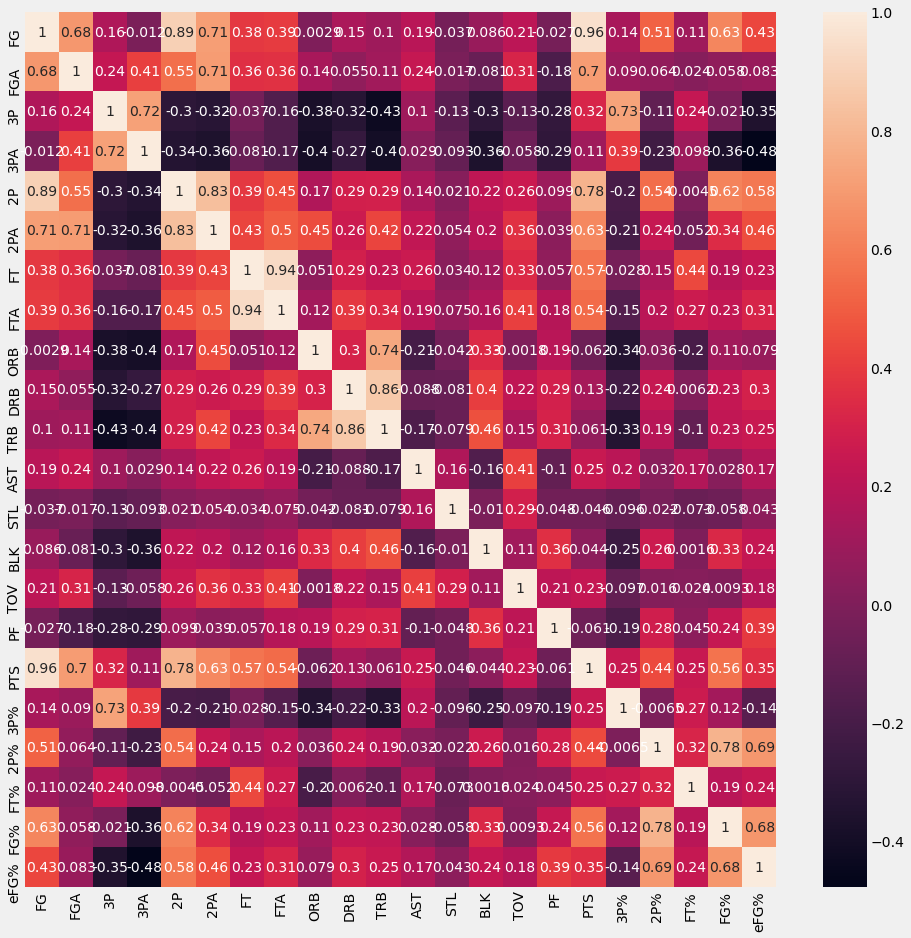

In [40]:
#create a correlation matrix of the data
corrMatrix = NBA.corr()
#create the subplots to plot the data to
f, (ax) = plt.subplots(figsize=(15,15))
#show the heatmap
sns.heatmap(corrMatrix, annot=True, ax=ax)
#show the plot
plt.show()

In [41]:
#drop the columns we are not interested in
X = NBA.drop(columns = ["Pos", "Player"])
y = NBA.Pos

<a id = "RF"></a>

Before we start with the algorithms, it is worth mentioning here that we will be introducing the algorithms here with the aim of simply showing you how to perform dimensionality reduction with each of them. Typically, when using these methods for modelling purposes we will have a train and a test dataset from the original data, and you will implement this in the [Problem workbook](problem.ipynb) but for now we will implement on the whole dataset and you can see how they behave.

### Random Forest

Random forest is one of the most widely used algorithms for feature selection because of the in built feature importance and ease of implementation through the scikit learn. We will not cover too much in detail the implementation of this algorithm as this can be found in the [Random Forest workshop](https://github.com/UCL-DSS/random-forest-workshop) but we are using this here with the aim of being able to predict the position of NBA players based on their statistics.

In [42]:
#import the classifier
from sklearn.ensemble import RandomForestClassifier

#build the classifier
clf = RandomForestClassifier(n_estimators =100, 
                             oob_score=True, 
                             max_depth =3,
                            random_state = 42)

#fit it the data that we have
clf.fit(X, y)

RandomForestClassifier(max_depth=3, oob_score=True, random_state=42)

Once we have built the classifier model, we can use it to extract feature importances which will tell us how much each varible has contributed to the ability of the model to predict the position. We can plot this as follows:

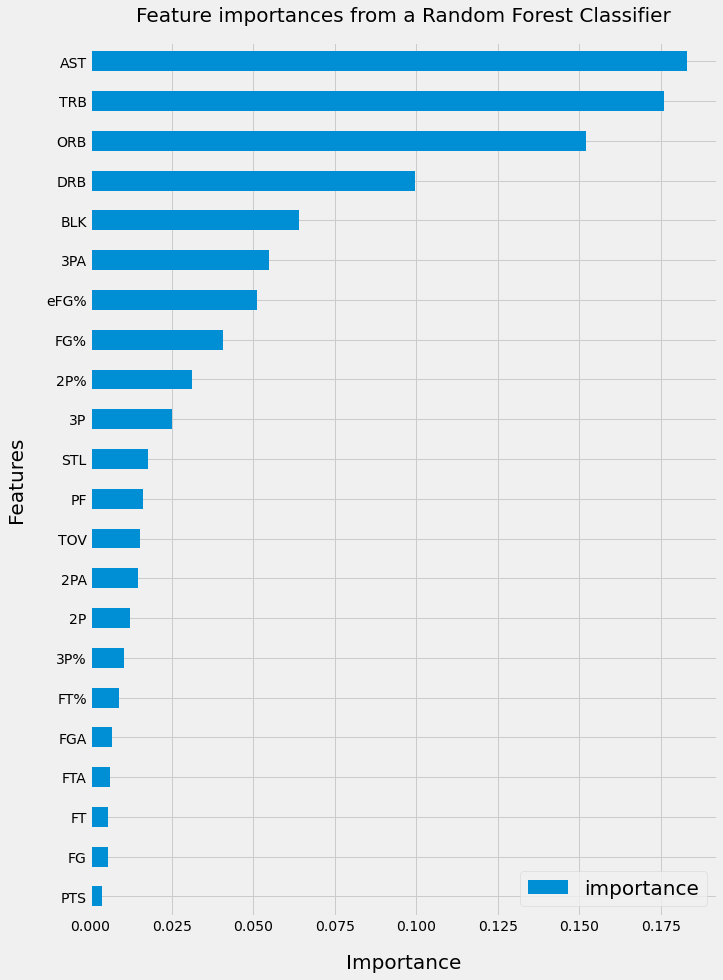

In [43]:
#set the plot style
plt.style.use("fivethirtyeight")

#we can then use the classifier to extract feature 
fi = pd.DataFrame({'feature': list(X.columns),
                  'importance': clf.feature_importances_}).\
                    sort_values('importance', ascending=True)

#we can plot the bar chart

fig, ax = plt.subplots(1,1, figsize = (10, 15))

fi.plot.barh(x = "feature", y = "importance",
            legend = True, ax = ax)

ax.set_xlabel("Importance", 
             fontsize = 20,
             labelpad = 20)
ax.set_ylabel("Features",
             fontsize = 20,
             labelpad = 20)
ax.set_title("Feature importances from a Random Forest Classifier",
            fontsize = 20,
            pad = 20)

ax.legend(fontsize = 20)

plt.show()

#save it if you want
#fig.savefig("Plots/feature_importance_rf.png", bbox_inches='tight')

This is telling us that total rebounds and Assists contribute the most to determining the position of an NBA player, while factors such as PTS, FTA and FG contribute fairly litte. 

We can choose to remove some of these unimportant features from the model in a variety of ways including:

- Removing those that contribute less than 1% to model explanatory power
- Removing those that contribute less than a random feature added into the model

In our case, we can examine varibales that contribute less than 1% and in theory remove them from our model and rerun it again later:

In [44]:
#extract vaiables with importance less than 0.01
fi[fi.importance <= 0.01]

feature  importance
16     PTS    0.003457
0       FG    0.005313
6       FT    0.005572
7      FTA    0.005894
1      FGA    0.006705
19     FT%    0.008939

This would simply mean that we remove variables from our model, not change them, and if we were to follow this process we would end up removing Points, FG, FT, FTA, FGA and FT% from our model.

Other methods for this can include examining the permutation importance which was covered in the Random forest workshop as well.

<a id = "PCA"></a>

### Principle Component Analysis (PCA)

PCA is just one of the linear algebra methods of dimensionality reduction. This helps us in extracting a new set of variables from an existing large set of variables in the form of Principle components. So, unlike Feature extraction from the Random Forest method above, it creates new variables. The aim of this is o capture as much information as possible in the smallest amount of principle components. The fewer the variables obtained while minimising the loss of information helps with model training in terms of the computing resiurces and time and helps with visualisation of the data.

Within this, a principle component is a linear combination of the original variables and is organised in a such a way that the first principle component explains the maximum amount of variance in the dataset. It does this as the first component results in a line which is closest to the data. The second principle component tries to then explain the remaining variance in the dataset an is uncorrelated with the first (i.e. is is orthogonal) and so on and so forth.

The directions of the components are identified in an unsupervised way, meaning that we don't focus on their relationship to the Y variable. This is unlike the Random Forest feature extraction above where we focus on variables that do not explain the target variable well. 

For this, we need to normalise the data before we perform PCA because otherwise it will lead to a large focus on variables with large variables which is undesirable (we can thus use scalers such as the robust or standard scaler from sklearn). This means that we should not apply PCA to categorical variables as although we can turn them into numerical variables through one-hot encoding, they will only take on values of 0 and 1 which will naturally be high in variability and thus affect the performance of the algorithm. 

We can thus implement the algorithm on normalised data:

In [45]:
#import the standard scaler
from sklearn.preprocessing import StandardScaler

#initialise the standard scaler
sc = StandardScaler()

#create a copy of the original dataset
X_rs = X.copy()

#fit transform all of our data
for c in X_rs.columns:
    X_rs[c] = sc.fit_transform(X_rs[c].values.reshape(-1,1))

In [46]:
#import the PCA algorithm from sklearn
from sklearn.decomposition import PCA 

#run it with 15 components
pca = PCA(n_components=15, whiten=True) 

#fit it to our data
pca.fit(X_rs)

#extract the explained variance
explained_variance = pca.explained_variance_ratio_
singular_values = pca.singular_values_

Now that we have fit the PCA to our data we actually need evaluate the model. We can do this through the explained variance ratio which can be used to see how useful the principles components can be and hence selecting which ones to be used in the model.

We can visualise this as follows:

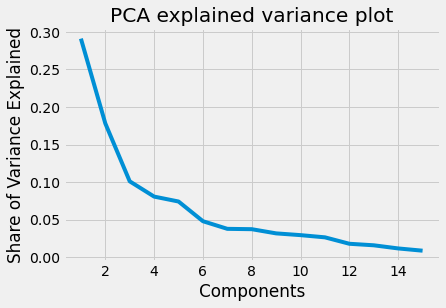

In [47]:
#create an x for each component
x = np.arange(1,len(explained_variance)+1)

#plot the results
plt.plot(x, explained_variance)

#add a y label
plt.ylabel('Share of Variance Explained')
plt.title("PCA explained variance plot")
plt.xlabel("Components")

#show the resuling plot
plt.show()

In [48]:
#iterate over the components
#to print the explained variance
for i in range(0, 15):
    print(f"Component {i:>2} accounts for {explained_variance[i]*100:>2.2f}% of variance")

Component  0 accounts for 29.10% of variance
Component  1 accounts for 17.82% of variance
Component  2 accounts for 10.11% of variance
Component  3 accounts for 8.08% of variance
Component  4 accounts for 7.43% of variance
Component  5 accounts for 4.81% of variance
Component  6 accounts for 3.79% of variance
Component  7 accounts for 3.74% of variance
Component  8 accounts for 3.18% of variance
Component  9 accounts for 2.95% of variance
Component 10 accounts for 2.66% of variance
Component 11 accounts for 1.80% of variance
Component 12 accounts for 1.60% of variance
Component 13 accounts for 1.18% of variance
Component 14 accounts for 0.88% of variance


If we were to use this data in a model then we would want to decide how many components to use in our model in order to balance the trade off betweem the computing resources required to run the model and how much performance we want from the model. For this there are a couple of methods that we can use to choose the optimal number of Principle Components:

- Examining the knee in the explained variance plot, which in our case appears around 4- 6 Principles Components
- Keeping components that account for more than 1% of the varaince in the dataset, which in our case will be after 14 Components
- Keeping variables that add up to 80% of explained variance in the model, which in our case would be the first 7 Components. 

This can depend on the purpose of the principle component analysis and what model you are implementing. In our case however, we want to try to visualise the data in 2 dimensions and see how that relates to our target variable. Thus, we can implemet this with 2 main principle components as follows:

In [49]:
#set the components to 2
pca = PCA(n_components=2, whiten=True) 
#fit the model to our data and extract the results
X_pca = pca.fit_transform(X_rs)

In [50]:
#create a dataframe from the dataset
df = pd.DataFrame(data = X_pca,
                 columns = ["Component 1", 
                            "Component 2"])

#merge this with the NBA data
NBA = pd.merge(NBA,
              df,
              left_index=True,
              right_index=True,
              how = "inner")

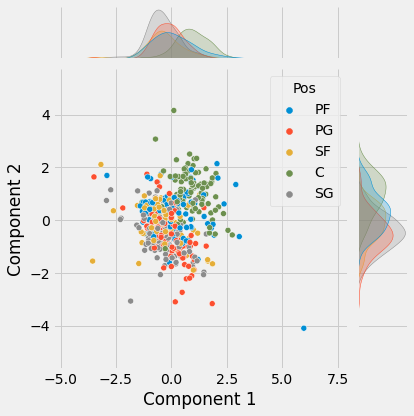

In [52]:
#plot the resulting data from two dimensions
g = sns.jointplot(data = NBA,
                 x = "Component 1",
                 y = "Component 2",
                 hue = "Pos")

What we can see from this plot is that reducing the data to a single component hasn't necessarily worked as we would want in terms of visualising the data in a 2D plot. However what we can get from this is that is that the Centre position can be appear unique from the rest of the positions, with a little merge with the Power Forward position (as we would expect), while there is quite some mixture between the Point Guard, Shooting Guard and Small Forward position, which is to be expected to some degree. The fact that these may be mixed up here suggests that they may not be well sepereted in a lower dimension space, or that the relationships between variables may be better represented through non-linear relationships. We can thus turn to t-SNE to see if that is the case.

<a id = "tsne"></a>

### t-Distrubuted Stochastic Neighbor Embedding (t-SNE)

t-SNE is another dimensionality reduction algorithm but unlike PCA, is able to account for non-linear relationships. In this sense, data points can be mapped in lower dimensions in two main ways:

- Local approaches: mapping nearby points on the higher dimensions to nearby points in the lower dimension also
- Global approaches: attempting to preserve the geometry at all scales so keeping nearby points close together while keeping far away points away from each other as well

t-SNE is one of the few algorithms that is able to retail both structures in the lower dimension data by calculating the probability similarity of points in high and low dimensional space.

The outputs of t-SNE are often referred to as dimensions created within the data and the inherent features are no longer identifiable in the data. This means that we cannot make ny inference based only on the output of t-SNE, restricting this to mostly a data exploration and visualisation tool such as creating maps in two dimensional space (our target here). However, the output can also be used in the process of classification and clustering (although not when creating a test and train dataset). 

When implementing a TSNE algorithm, there are a few key hyperparamaters that you need to pay attention to. These include:

- n_components: The dimensions to be created from the data
- perplexity: related to the number of nearest neighbors used in other manifold learning algorithms it is used to determine the trade off between global and local relationships in the model to be retained. While it is noted t-SNE is often not very sensitive to this paramater it should be smaller than the number of points with the optimal range suggested to be within 5 and 50
- learning_rate - The learning rate can often be a critical paramater to how the model behaves so it can be worth exploring the paramater space in this regard, but it is often between 100 and 1000.

The scikit learn documentation recommends that we use PCA or truncated SVD before t-SNE if the number of features in the dataset is more than 50 because of the complexity of the algorithm. However, in our case, this shouldn't be an issue so we can implement the model on the data:

In [54]:
#import the method
from sklearn.manifold import TSNE

#set the hyperparmateres
keep_dims = 2
lrn_rate = 700
prp = 40

#extract the data as a cop
tsnedf = X_rs.copy()

#creae the model
tsne = TSNE(n_components = keep_dims, 
            perplexity = prp, 
            random_state = 42,
            n_iter = 5000,
            n_jobs = -1)

#apply it to the data
X_dimensions = tsne.fit_transform(tsnedf)
#check the shape
X_dimensions.shape

(530, 2)

In [55]:
#create a dataframe from the dataset
tsnedf_res = pd.DataFrame(data = X_dimensions,
                         columns = ["Dimension 1", 
                                "Dimension 2"])

#merge this with the NBA data
NBA = pd.merge(NBA,
              tsnedf_res,
              left_index=True,
              right_index=True,
              how = "inner")

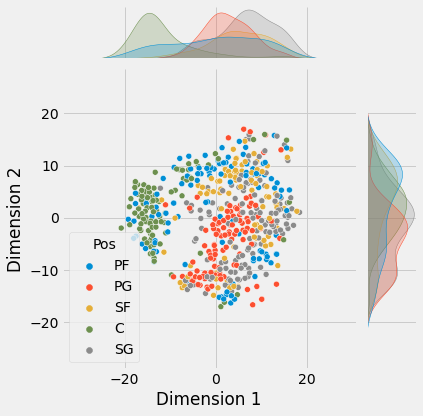

In [56]:
#plot the result
g = sns.jointplot(data = NBA,
                 x = "Dimension 1",
                 y = "Dimension 2",
                 hue = "Pos")

What we can see here, is that we get a slight different clearer picture of the different positions to some degree than we did with PCA before. We can see now that the centre position appears more distinct, the shooting guard appears very widely distributed, while the Point Guard tend to concentrate together and the Small Forward and Powerforward tend to also cluster together, although the power forward also merges to some degree with the the Centre position.

This makes it slightly clearer and suggests that the relationships between variables may indeed be non-linear!

In [59]:
#output our resulting dataframe
NBA.to_csv("Data/NBA_cleaned.csv",
          index = False)

## Sources:

https://medium.com/analytics-vidhya/a-complete-guide-on-dimensionality-reduction-62d9698013d2

https://machinelearningmastery.com/dimensionality-reduction-algorithms-with-python/

https://www.analyticsvidhya.com/blog/2018/08/dimensionality-reduction-techniques-python/

https://www.analyticsvidhya.com/blog/2017/01/t-sne-implementation-r-python/

https://www.analyticsvidhya.com/blog/2016/03/pca-practical-guide-principal-component-analysis-python/

https://towardsdatascience.com/dimension-reduction-techniques-with-python-f36ca7009e5c

https://stackabuse.com/dimensionality-reduction-in-python-with-scikit-learn/

https://towardsdatascience.com/principal-component-analysis-pca-with-scikit-learn-1e84a0c731b0

https://towardsdatascience.com/avoid-these-deadly-modeling-mistakes-that-may-cost-you-a-career-b9b686d89f2c

https://www.datacamp.com/community/tutorials/principal-component-analysis-in-python